In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.datasets import load_iris
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

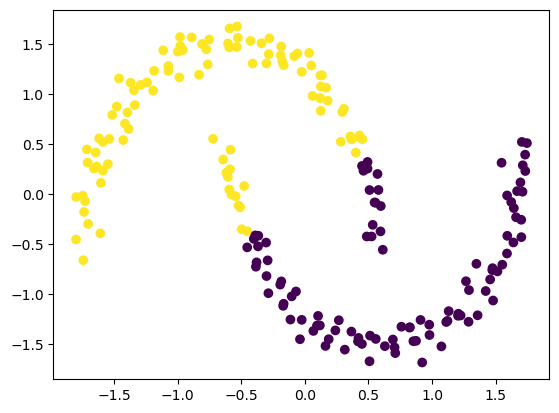

In [3]:
# k-means fails at complex shapes of clusters 
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200, noise = 0.05, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =2,n_init = 10, random_state=0)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
plt.scatter(X_scaled[:,0],X_scaled[:,1], c=y_pred)


Text(0, 0.5, 'feature2')

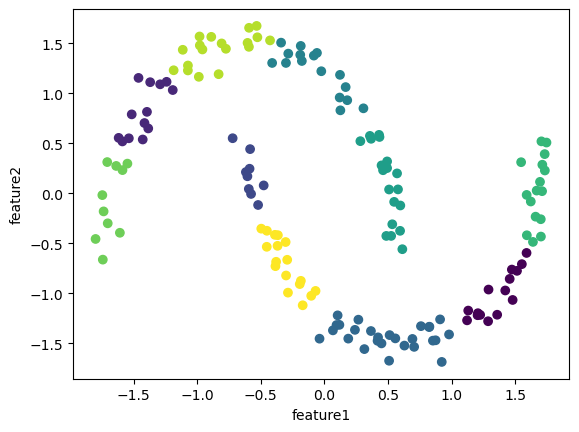

In [40]:
#using kmeans for feature engineering
X_train, X_test , y_train, y_test = train_test_split(X_scaled, y, test_size=0.20,random_state=42)
kmeans = KMeans(n_clusters =10,n_init=10, random_state=0)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_train)
plt.scatter(X_train[:,0],X_train[:,1], c=y_pred)
plt.xlabel('feature1')
plt.ylabel('feature2')


In [41]:
#extracting distance features
dist_features_train = kmeans.transform(X_train)
dist_features_test = kmeans.transform(X_test)


In [42]:
# create and train the model after k-means
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(random_state = 40)
logreg_model.fit(dist_features_train,y_train)
print("training set score is : {:.3f}" .format(logreg_model.score(dist_features_train,y_train)))
print("test set score is : {:.3f}" .format(logreg_model.score(dist_features_test,y_test)))


training set score is : 0.950
test set score is : 0.975


Text(0, 0.5, 'feature2')

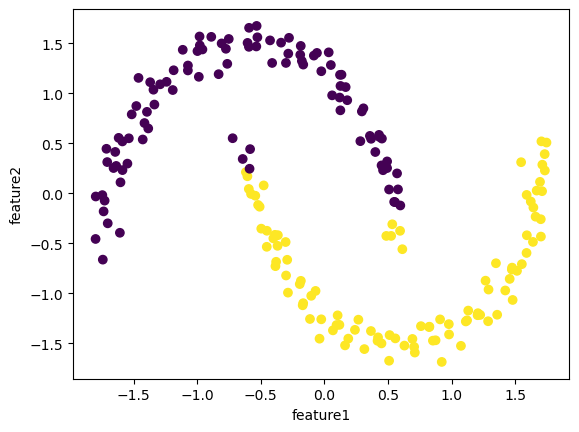

In [43]:
#visualizing the performance
dist_features = kmeans.transform(X_scaled)
y_pred = logreg_model.predict(dist_features)
plt.scatter(X_scaled[:,0],X_scaled[:,1], c=y_pred)
plt.xlabel('feature1')
plt.ylabel('feature2')


#### Kmeans for image segementation

In [44]:
!pip install opencv-python

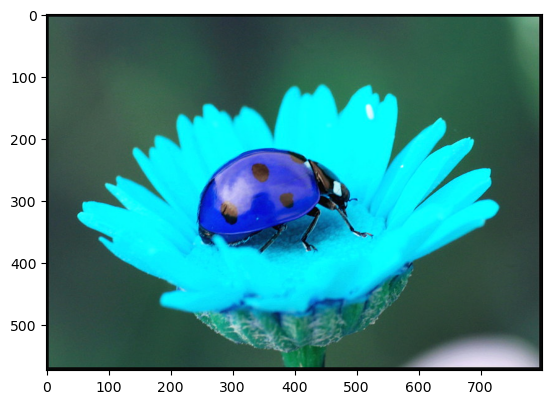

In [45]:
import cv2
image = cv2.imread('/home/jovyan/Cheme545/ladybug.png')
image.shape
plt.imshow(image)

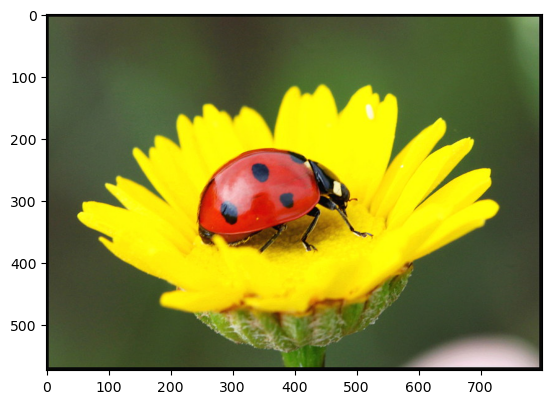

In [46]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [47]:
#from PIL import Image
#img = Image.fromarray(image)
#img.mode

In [48]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
X = image_rgb.reshape((-1,3))
 
# Convert to float type
X = np.float32(X)

In [49]:
kmeans = KMeans(n_clusters=10,n_init = 10, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = np.uint8(segmented_img)
segmented_img = segmented_img.reshape(image_rgb.shape)

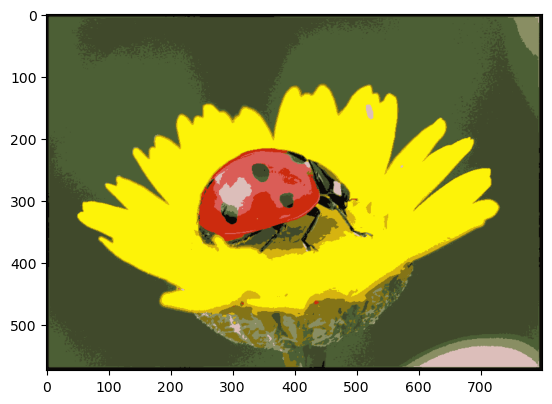

In [50]:
plt.imshow(segmented_img)

### HCA 

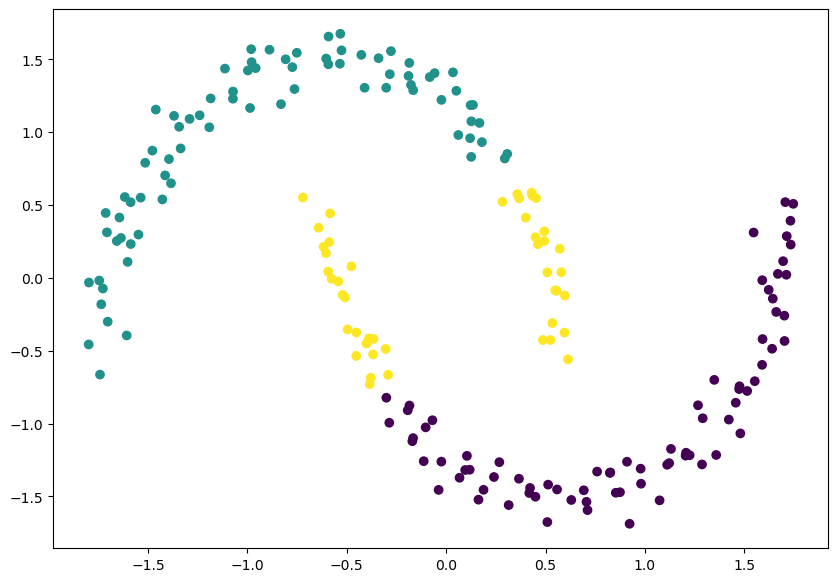

In [9]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')  
cluster.fit_predict(X_scaled)
plt.figure(figsize=(10, 7))  
plt.scatter(X_scaled[:,0],X_scaled[:,1], c=cluster.labels_) 




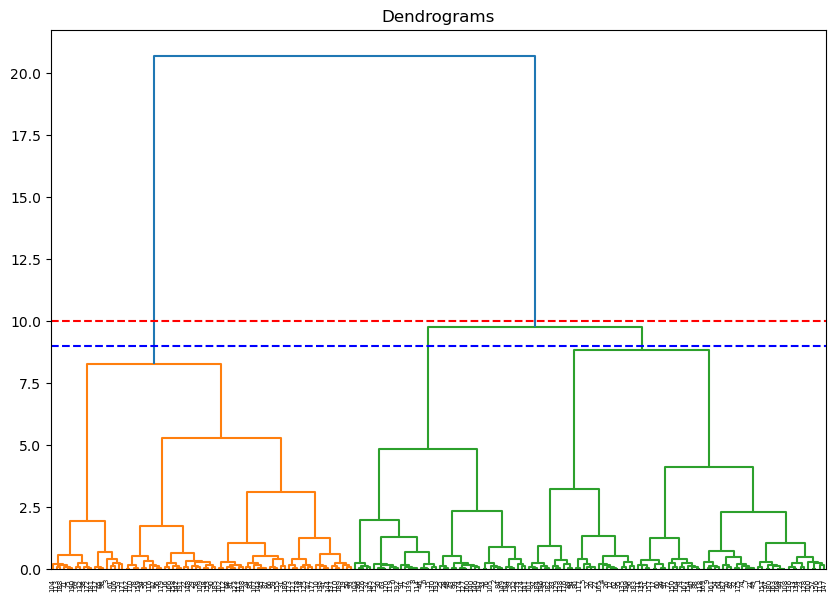

In [6]:
# Hierarchical clustering 
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.axhline(y=10, color='r', linestyle='--')
plt.axhline(y=9, color='b', linestyle='--')
